# HackerEarth Machine Learning challenge: Will your employees leave you?

### Top 6% finish (Out of 5000+ participants)

Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. The objective of this challenge is to predict the attrition rate of employees of an organization. 

This competition is organized by HackerEarth.

Competition link:
https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-employee-attrition-rate/

#### Response Variable: Attrition_rate
#### Evaluation Metric: 
#### Score = 100*max(0,1-RMSE(actual_values, predicted_values))

In [1]:
# Set working path
setwd("E:\\Hackerearth\\Employee Attrition\\Dataset")

In [3]:
# Load libraries
suppressWarnings(library(dplyr))
suppressWarnings(library(caret))
suppressWarnings(library(Metrics))
suppressWarnings(library(MLmetrics))
suppressWarnings(library(mice))
suppressWarnings(library(rcompanion))

In [4]:
# Load dataset

tr <- read.csv("Train.csv",stringsAsFactors = F)
te <- read.csv("Test.csv",stringsAsFactors = F)

In [5]:
# Checking for blanks

colSums(tr=='')
colSums(te=='')

Employee_ID                    Gender                       Age 
                        0                         0                        NA 
          Education_Level       Relationship_Status                  Hometown 
                        0                         0                         0 
                     Unit    Decision_skill_possess           Time_of_service 
                        0                         0                        NA 
     Time_since_promotion               growth_rate               Travel_Rate 
                        0                         0                         0 
               Post_Level                 Pay_Scale Compensation_and_Benefits 
                        0                        NA                         0 
        Work_Life_balance                      VAR1                      VAR2 
                       NA                         0                        NA 
                     VAR3                      VAR4                      VAR5 
                        0                        NA                         0 
                     VAR6                      VAR7            Attrition_rate 
                        0                         0                         0

Employee_ID                    Gender                       Age 
                        0                         0                        NA 
          Education_Level       Relationship_Status                  Hometown 
                        0                         0                         0 
                     Unit    Decision_skill_possess           Time_of_service 
                        0                         0                        NA 
     Time_since_promotion               growth_rate               Travel_Rate 
                        0                         0                         0 
               Post_Level                 Pay_Scale Compensation_and_Benefits 
                        0                        NA                         0 
        Work_Life_balance                      VAR1                      VAR2 
                       NA                         0                        NA 
                     VAR3                      VAR4                      VAR5 
                        0                        NA                         0 
                     VAR6                      VAR7 
                        0                         0

There are no blanks but some variables have NA values

In [6]:
# Checking NAs
round(colSums(is.na(tr))*100/nrow(tr),2)

Employee_ID                    Gender                       Age 
                     0.00                      0.00                      5.89 
          Education_Level       Relationship_Status                  Hometown 
                     0.00                      0.00                      0.00 
                     Unit    Decision_skill_possess           Time_of_service 
                     0.00                      0.00                      2.06 
     Time_since_promotion               growth_rate               Travel_Rate 
                     0.00                      0.00                      0.00 
               Post_Level                 Pay_Scale Compensation_and_Benefits 
                     0.00                      0.13                      0.00 
        Work_Life_balance                      VAR1                      VAR2 
                     0.16                      0.00                      8.24 
                     VAR3                      VAR4                      VAR5 
                     0.00                      9.37                      0.00 
                     VAR6                      VAR7            Attrition_rate 
                     0.00                      0.00                      0.00

NAs are present in Age, Time_of_service, Pay_Scale, Work_Life_balance, VAR2, VAR4

In [7]:
# Data Statistics

str(tr)

'data.frame':	7000 obs. of  24 variables:
 $ Employee_ID              : chr  "EID_23371" "EID_18000" "EID_3891" "EID_17492" ...
 $ Gender                   : chr  "F" "M" "F" "F" ...
 $ Age                      : num  42 24 58 26 31 54 21 NA 40 45 ...
 $ Education_Level          : int  4 3 3 3 1 3 4 3 4 3 ...
 $ Relationship_Status      : chr  "Married" "Single" "Married" "Single" ...
 $ Hometown                 : chr  "Franklin" "Springfield" "Clinton" "Lebanon" ...
 $ Unit                     : chr  "IT" "Logistics" "Quality" "Human Resource Management" ...
 $ Decision_skill_possess   : chr  "Conceptual" "Analytical" "Conceptual" "Behavioral" ...
 $ Time_of_service          : num  4 5 27 4 5 19 2 34 13 21 ...
 $ Time_since_promotion     : int  4 4 3 3 4 1 1 4 1 4 ...
 $ growth_rate              : int  33 36 51 56 62 21 50 23 49 34 ...
 $ Travel_Rate              : int  1 0 0 1 1 2 1 1 0 0 ...
 $ Post_Level               : int  1 3 2 3 3 5 1 4 1 2 ...
 $ Pay_Scale                : num

## Data cleaning and EDA

#### Null Value Treatment

Here, mice function from mice package is used to predict and impute NAs. CART method is used for prediction.

In [8]:
imputedValues <- mice(data=tr
                      , seed=42     # keep to replicate results
                      , method="cart" # model you want to use
                      , m=5           # Number of multiple imputations
                      , maxit = 1     # number of iterations
)

# impute the missing values in our tr data.frame
tr <- mice::complete(imputedValues,1) # completely fills in the missing


 iter imp variable
  1   1  Age  Time_of_service  Pay_Scale  Work_Life_balance  VAR2  VAR4
  1   2  Age  Time_of_service  Pay_Scale  Work_Life_balance  VAR2  VAR4
  1   3  Age  Time_of_service  Pay_Scale  Work_Life_balance  VAR2  VAR4
  1   4  Age  Time_of_service  Pay_Scale  Work_Life_balance  VAR2  VAR4
  1   5  Age  Time_of_service  Pay_Scale  Work_Life_balance  VAR2  VAR4


Warning message:
"Number of logged events: 7"


The treatment is done for test data

In [9]:
imputedValues <- mice(data=te
                      , seed=42     # keep to replicate results
                      , method="cart" # model you want to use
                      , m=5           # Number of multiple imputations
                      , maxit = 1     # number of iterations
)

# impute the missing values in our tr data.frame
te <- mice::complete(imputedValues,1) # completely fills in the missing


 iter imp variable
  1   1  Age  Time_of_service  Pay_Scale  Work_Life_balance  VAR2  VAR4
  1   2  Age  Time_of_service  Pay_Scale  Work_Life_balance  VAR2  VAR4
  1   3  Age  Time_of_service  Pay_Scale  Work_Life_balance  VAR2  VAR4
  1   4  Age  Time_of_service  Pay_Scale  Work_Life_balance  VAR2  VAR4
  1   5  Age  Time_of_service  Pay_Scale  Work_Life_balance  VAR2  VAR4


Warning message:
"Number of logged events: 7"


In [10]:
# Checking unique elements across every column
sapply(tr,function(x){length(unique(x))})

Employee_ID                    Gender                       Age 
                     7000                         2                        47 
          Education_Level       Relationship_Status                  Hometown 
                        5                         2                         5 
                     Unit    Decision_skill_possess           Time_of_service 
                       12                         4                        44 
     Time_since_promotion               growth_rate               Travel_Rate 
                        5                        55                         3 
               Post_Level                 Pay_Scale Compensation_and_Benefits 
                        5                        10                         5 
        Work_Life_balance                      VAR1                      VAR2 
                        5                         5                         5 
                     VAR3                      VAR4                      VAR5 
                        5                         3                         5 
                     VAR6                      VAR7            Attrition_rate 
                        5                         5                      3317

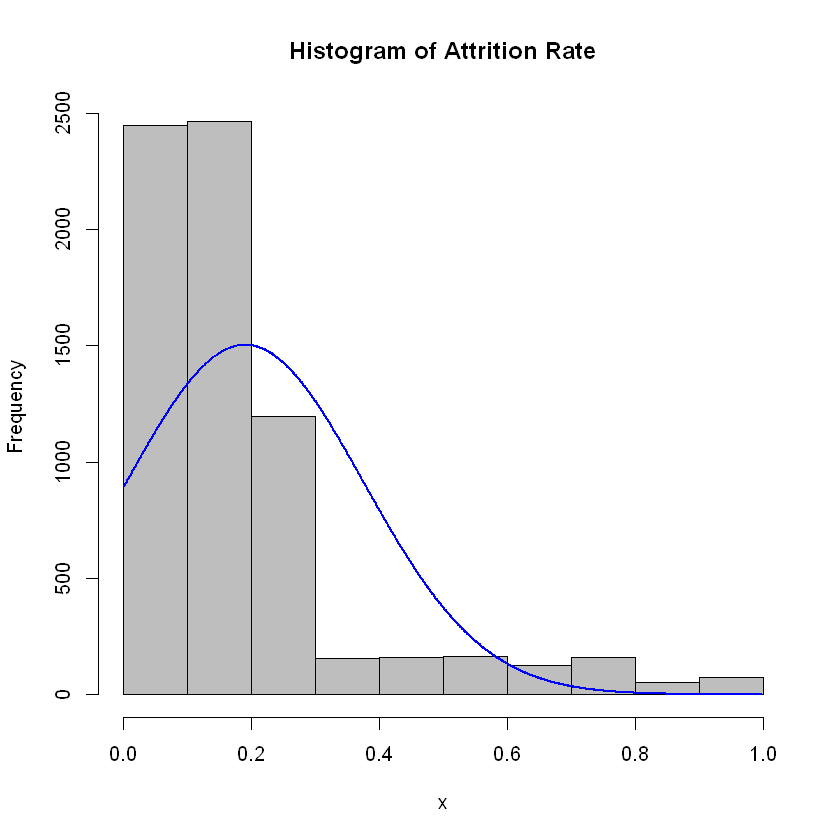

In [11]:
plotNormalHistogram(tr$Attrition_rate, main = "Histogram of Attrition Rate")

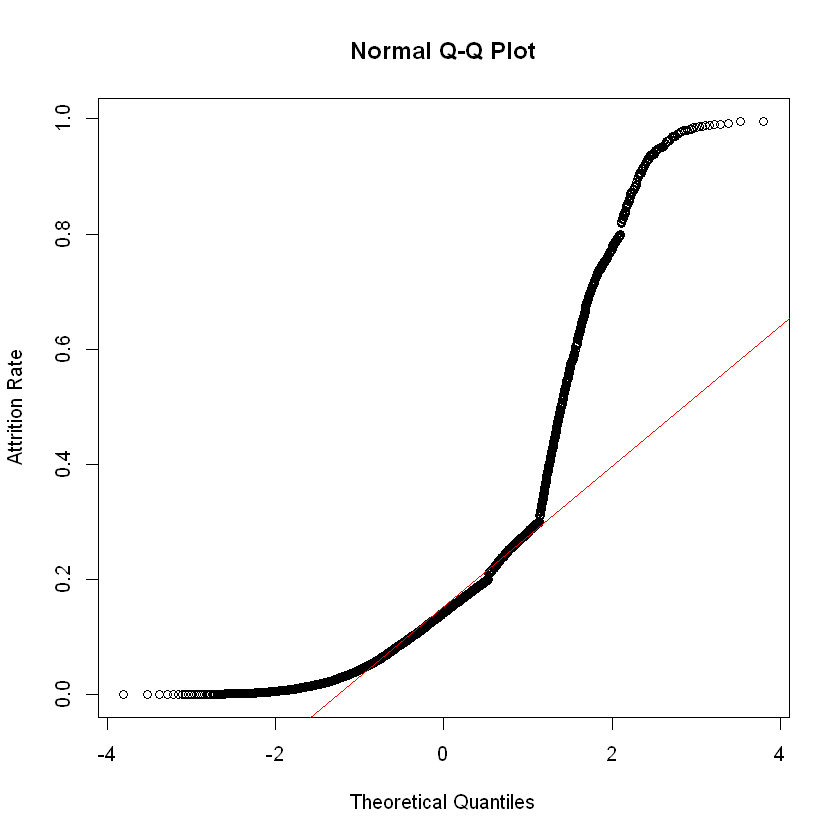

In [12]:
qqnorm(tr$Attrition_rate,
       ylab="Attrition Rate")

qqline(tr$Attrition_rate,
       col="red")

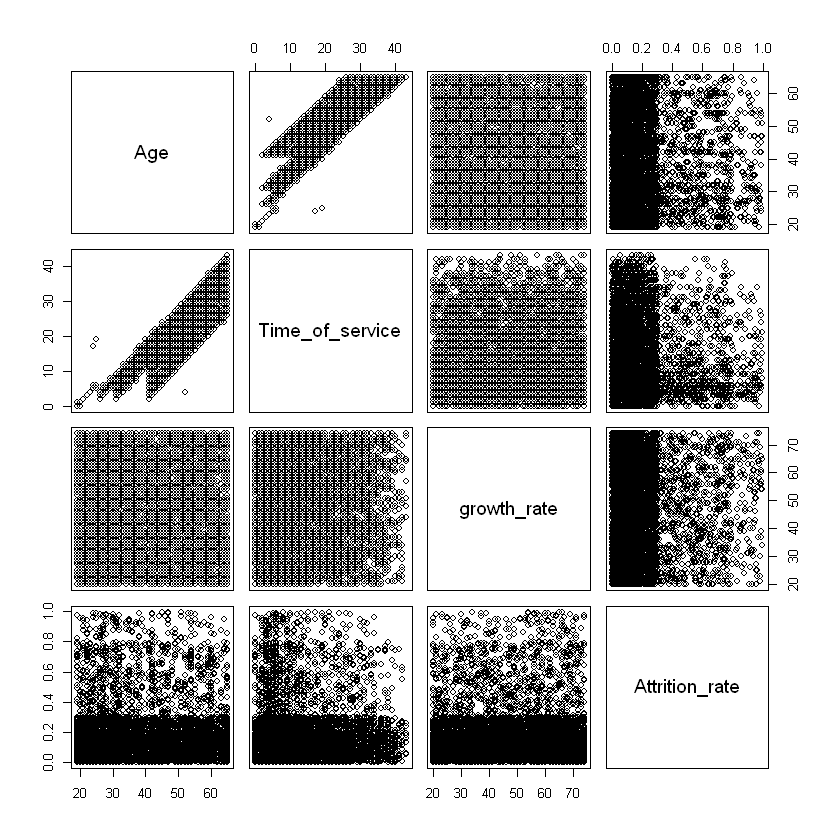

In [13]:
pairs(tr[c('Age','Time_of_service','growth_rate','Attrition_rate')])

Pair plots are used to explain the relationship among numerical variables. We find that Age and Time of Service are linearly correlated.

In [17]:
gender_attrition <- aggregate(Attrition_rate~Gender, data=tr, FUN=mean, na.rm=T)

gender_attrition

Gender,Attrition_rate
<chr>,<dbl>
F,0.1849356
M,0.1957062


Average attrition rate of Male is slightly higher than females.

In [20]:
relation_attrition <- aggregate(Attrition_rate~Relationship_Status, data=tr, FUN=mean, na.rm=T)

relation_attrition

Relationship_Status,Attrition_rate
<chr>,<dbl>
Married,0.1881232
Single,0.1916597


Average attrition rate of Single status is slightly higher than Married status.

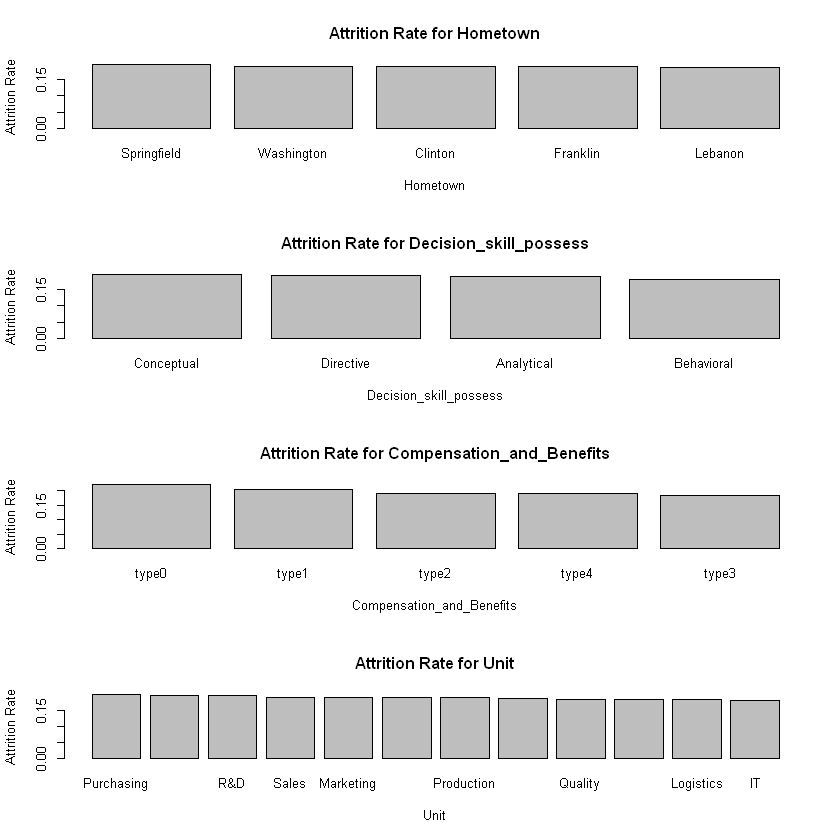

In [24]:
fact_cols <- c('Hometown','Decision_skill_possess','Compensation_and_Benefits','Unit')

layout(matrix(c(1,1,1,2,2,2,3,3,3,4,4,4), 4, 3, byrow = TRUE))

for (i in fact_cols){
  plot_table <- aggregate(Attrition_rate ~ get(i), data=tr, FUN=mean, na.rm=T)
  plot_table <- plot_table %>% arrange(desc(Attrition_rate))
  names(plot_table)[1] <- i
  barplot(plot_table$Attrition_rate,names = plot_table[,i],
          xlab = i, ylab = "Attrition Rate",
          main = paste("Attrition Rate for",i))
}

## Preprocessing Data

#### One Hot Encoding - Gender and Relationship_Status

In [25]:
# One Hot Encoding - Gender and Relationship_Status

tr$Gender <- ifelse(tr$Gender == "F",1,0)
te$Gender <- ifelse(te$Gender == "F",1,0)

tr$Relationship_Status <- ifelse(tr$Relationship_Status == "Married",1,0)
te$Relationship_Status <- ifelse(te$Relationship_Status == "Married",1,0)

In [26]:
# Store IDs to use it later
tr_id <- tr$Employee_ID
te_id <- te$Employee_ID

# Remove IDs from data
tr$Employee_ID <- NULL
te$Employee_ID <- NULL

#### Label Encoding

In [28]:
# Label Encoding 

for (i in fact_cols){
  tr[[i]] <- as.numeric(as.factor(tr[[i]]))
  te[[i]] <- as.numeric(as.factor(te[[i]]))
}

In [29]:
d <- tr

# Storing Response variable in separate object
y <- d$Attrition_rate
d$Attrition_rate <- NULL

#### The data is preprocessed using preProcess() function from caret package
#### The data is transformed using z-score and Box-Cox to make it standardized and bell shaped

In [30]:
#### Pre Processing

preProcValues <- preProcess(d, method = c("center","scale","BoxCox"))

d <- predict(preProcValues, d)

# Do for test

preProctest <- preProcess(te, method = c("center","scale","BoxCox"))

te <- predict(preProctest, te)

d$y <- y

## Modeling

#### Here, a custom metric is defined and data is trained based on this metric
#### Score = 100*max(0,1-RMSE(actual_values, predicted_values))
##### Score is function of RMSE

In [31]:
# Define Eval Metric

score <- function (data,
                   lev = NULL,
                   model = NULL) {
  out <- 100*max(0,1-RMSE(data$obs, data$pred))
  names(out) <- "Score"
  out
}

#### A 5-fold CV is prepared to train the data

In [32]:
# Train control

ctrl <- trainControl(method="cv",     # cross-validation set approach to use
                     number=5,        # k number of times to do k-fold
                     classProbs = FALSE,  # if you want probabilities
                     summaryFunction = score,  # for regression
                     allowParallel=T,
                     verboseIter = T
)

### Models used for training: 
#### GBM, Random Forest, XGBoost, LightGBM, Ridge and Lasso Regression.

##### Here, only Ridge and Lasso Regression are used as they performed well on train and test data.

In [35]:
# Set parameters for Ridge

ridge_grid <- expand.grid(alpha = 0, lambda = 1)

In [36]:
# Set seed
set.seed(42)

# Train
ridge_model <- train(y~.,
                   data = d,        # train set used to build model
                   method = "glmnet",      # type of model you want to build
                   trControl = ctrl,    # how you want to learn
                   metric = "Score",       # performance measure
                   tuneGrid = ridge_grid)

+ Fold1: alpha=0, lambda=1 
- Fold1: alpha=0, lambda=1 
+ Fold2: alpha=0, lambda=1 
- Fold2: alpha=0, lambda=1 
+ Fold3: alpha=0, lambda=1 
- Fold3: alpha=0, lambda=1 
+ Fold4: alpha=0, lambda=1 
- Fold4: alpha=0, lambda=1 
+ Fold5: alpha=0, lambda=1 
- Fold5: alpha=0, lambda=1 
Aggregating results
Fitting final model on full training set


In [41]:
# Predict on train data
y_pred6_tr <- predict(ridge_model,d)

# Print RMSE
print(RMSE(y_pred6_tr,d$y))

[1] 0.1855832


In [42]:
# Predict on test data
y_pred6 <- predict(ridge_model,te)

# Store result as a data frame
results <- data.frame(cbind(te_id,y_pred6))
names(results) <- c("Employee_ID","Attrition_rate")	

# write.table(results, "Submissions\\ridge_1.csv", row.names = F, sep = ",")

In [43]:
# Set parameters for Lasso
lasso_grid <- expand.grid(alpha = 1, lambda = 1)

In [44]:
# Set seed
set.seed(42)

# Train
lasso_model <- train(y~.,
                     data = d,        # train set used to build model
                     method = "glmnet",      # type of model you want to build
                     trControl = ctrl,    # how you want to learn
                     metric = "Score",       # performance measure
                     tuneGrid = lasso_grid)

+ Fold1: alpha=1, lambda=1 
- Fold1: alpha=1, lambda=1 
+ Fold2: alpha=1, lambda=1 
- Fold2: alpha=1, lambda=1 
+ Fold3: alpha=1, lambda=1 
- Fold3: alpha=1, lambda=1 
+ Fold4: alpha=1, lambda=1 
- Fold4: alpha=1, lambda=1 
+ Fold5: alpha=1, lambda=1 
- Fold5: alpha=1, lambda=1 
Aggregating results
Fitting final model on full training set


In [45]:
# Predict on train data
y_pred7_tr <- predict(lasso_model,d)

# Print RMSE
print(RMSE(y_pred7_tr,d$y))

[1] 0.18574


In [46]:
# Predict on test data
y_pred7 <- predict(lasso_model,te)

# Store result as a data frame
results <- data.frame(cbind(te_id,y_pred7))
names(results) <- c("Employee_ID","Attrition_rate")	

# write.table(results, "Submissions\\lasso_1.csv", row.names = F, sep = ",")

#### The Ridge Regression gave a score of 81.26217 out of 100
#### The Lasso Regression gave a score of 81.26120 out of 100

### Final model: Ridge Regression
### Test Score: 81.26217 (Top 6% finish out of 5000+ participants)
### For a complete set of models used, please visit the R code